In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
print(train_df.shape)

(614, 13)


In [5]:
print(test_df.shape)

(367, 12)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
train_df['Gender'] = train_df['Gender'].fillna(train_df['Gender'].mode()[0])
test_df['Gender'] = test_df['Gender'].fillna(test_df['Gender'].mode()[0])

In [11]:
train_df['Married'] = train_df['Married'].fillna(train_df['Married'].mode()[0])

In [12]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
train_df['Dependents'] = train_df['Dependents'].fillna(train_df['Dependents'].mode()[0])
test_df['Dependents'] = test_df['Dependents'].fillna(test_df['Dependents'].mode()[0])

In [14]:
train_df['Self_Employed'] = train_df['Self_Employed'].fillna('No')
test_df['Self_Employed'] = test_df['Self_Employed'].fillna('No')

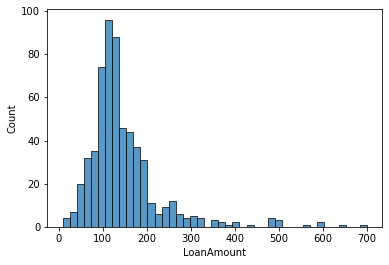

In [15]:
sns.histplot(train_df['LoanAmount'])
plt.show()

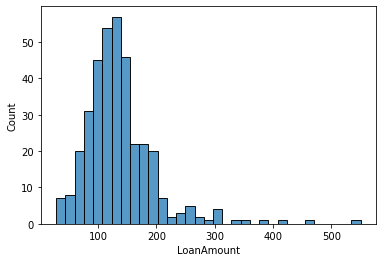

In [16]:
sns.histplot(test_df['LoanAmount'])
plt.show()

In [17]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(method='ffill')
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(method='ffill')

In [18]:
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(method='ffill')
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(method='ffill')

In [19]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())

In [20]:
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0])
test_df['Credit_History'] = test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0])

In [21]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [23]:
train_df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [24]:
test_df['Dependents'].value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [25]:
train_df['Dependents'] = train_df['Dependents'].replace('3+',3)
test_df['Dependents'] = test_df['Dependents'].replace('3+',3)

In [26]:
train_df['Gender'] = train_df['Gender'].replace({'Male': 1, 'Female' : 0})
test_df['Gender'] = test_df['Gender'].replace({'Male': 1, 'Female' : 0})

In [27]:
train_df['Married'] = train_df['Married'].replace({'Yes': 1, 'No' : 0})
test_df['Married'] = test_df['Married'].replace({'Yes': 1, 'No' : 0})

In [28]:
train_df['Education'] = train_df['Education'].replace({'Graduate': 1, 'Not Graduate' : 0})
test_df['Education'] = test_df['Education'].replace({'Graduate': 1, 'Not Graduate' : 0})

In [29]:
train_df['Self_Employed'] = train_df['Self_Employed'].replace({'Yes': 1, 'No' : 0})
test_df['Self_Employed'] = test_df['Self_Employed'].replace({'Yes': 1, 'No' : 0})

In [30]:
train_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [31]:
train_df['Property_Area'] = train_df['Property_Area'].replace({'Semiurban': 1, 'Rural' : 0, 'Urban':2})
test_df['Property_Area'] = test_df['Property_Area'].replace({'Semiurban': 1, 'Rural' : 0, 'Urban': 2})

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 34.5+ KB


In [34]:
train_df['Dependents'] = train_df['Dependents'].astype('int')
test_df['Dependents'] = test_df['Dependents'].astype('int')

In [35]:
train_df['Dependents'].dtype

dtype('int32')

In [36]:
test_df['Dependents'].dtype

dtype('int32')

In [37]:
X_train = train_df.drop(['Loan_ID', 'Loan_Status'], axis = 1)
X_test = test_df.drop('Loan_ID', axis = 1)
y_train = train_df['Loan_Status']

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, r2_score

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

print("Accuracy score_train = ", accuracy_score(y_train,y_train_pred ))
print('AUC_train = ', roc_auc_score(y_train, y_train_prob))
#print('\n')
#print("Accuracy score_test = ", accuracy_score(ytest,y_test_pred ))
#print('AUC_test = ', roc_auc_score(ytest, y_test_prob))

Accuracy score_train =  1.0
AUC_train =  1.0


In [45]:
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier()

param_dist = {'n_estimators': sp_randint(50,250),
              'max_depth': sp_randint(2,25),
              'max_features': sp_randint(2,11),
              'min_samples_split': sp_randint(2,25),
              'min_samples_leaf' : sp_randint(1,50),             
             }

In [47]:
from sklearn.model_selection import RandomizedSearchCV

rsearch = RandomizedSearchCV(rfc, param_distributions = param_dist, cv = 3, scoring= 'roc_auc', n_iter=50, random_state=42)

rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002091780D048>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002091780D808>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020917811908>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002091780DFC8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020917809E48>},
                   random_state=42, scoring='roc_auc')

In [48]:
rsearch.best_params_

{'max_depth': 18,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 103}

In [49]:
rfc = RandomForestClassifier(**rsearch.best_params_, random_state = 42)

rfc.fit(X_train, y_train)

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

print("Accuracy score_train = ", accuracy_score(y_train,y_train_pred ))
print('AUC_train = ', roc_auc_score(y_train, y_train_prob))

Accuracy score_train =  0.8990228013029316
AUC_train =  0.9928663112164297


In [52]:
finaldf = pd.DataFrame(test_df['Loan_ID'])

In [53]:
finaldf['Loan_Status'] = y_test_pred

In [54]:
finaldf.set_index('Loan_ID')

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,N
...,...
LP002971,Y
LP002975,Y
LP002980,Y


In [55]:
finaldf.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [56]:
finaldf.to_csv('RandomForest_submission.csv')